# Homework 4
## Alex Pine, akp258

### Question 1: Topic modeling code

In [ ]:
# Hack to get python to look for the pip modules before the OS X versions.
# This ensures the newest version of the 'six' library is used, which gensim requires.
import sys
sys.path.insert(0, '/Library/Python/2.7/site-packages')
import gensim

#### 1.a: Prepare document corpus
Using the UC Irvine's "Daily Kos" weblog corpus.

In [65]:
from gensim import corpora, models

corpus = corpora.UciCorpus('docword.kos.txt', fname_vocab='vocab.kos.txt')

#### 1.b Prepare Document Corpus
Train LDA models with default parameters. gensim's LDA module defaults to 100 topics.

In [66]:
# Defaults to num_topics=100
default_model = models.LdaMulticore(corpus, id2word=corpus.create_dictionary(), workers=4)

In [70]:
def print_top_topics(model, num_topics):
    print 'Number of topics:', model.num_topics
    for i, topic in enumerate(default_model.print_topics(num_topics=num_topics, num_words=6)):
        print 'Topic', str(i+1), ':', topic

print_top_topics(default_model, 100)

Number of topics: 100
Topic 1 : 0.013*bush + 0.011*campaign + 0.007*kerry + 0.007*democratic + 0.006*senate + 0.005*time
Topic 2 : 0.016*november + 0.011*bush + 0.008*republicans + 0.008*poll + 0.007*senate + 0.007*house
Topic 3 : 0.014*iraq + 0.011*kerry + 0.010*bush + 0.008*war + 0.005*news + 0.005*campaign
Topic 4 : 0.027*bush + 0.010*kerry + 0.007*war + 0.007*general + 0.006*campaign + 0.005*people
Topic 5 : 0.007*bush + 0.006*iraq + 0.005*campaign + 0.005*democrats + 0.005*senate + 0.004*news
Topic 6 : 0.012*dean + 0.008*iowa + 0.008*kerry + 0.007*campaign + 0.007*bush + 0.007*general
Topic 7 : 0.008*bush + 0.008*democratic + 0.007*war + 0.007*iraq + 0.005*november + 0.005*kerry
Topic 8 : 0.017*bush + 0.013*kerry + 0.008*million + 0.007*republicans + 0.006*administration + 0.005*senate
Topic 9 : 0.008*bush + 0.007*primary + 0.006*states + 0.006*iraq + 0.006*democratic + 0.006*house
Topic 10 : 0.016*bush + 0.009*kerry + 0.007*iraq + 0.007*state + 0.006*war + 0.005*house
Topic 11 : 

##### Analysis
The top five topics have a great deal of overlap. All of them are about the 2004 US presidential election. The first topic refers contains topics words related to electoral politics in general, and a few words specific to that election, such as "marriage" (as in "gay marriage", I assume). The second topic is similar, and the third topic is about presidential challengers "Kerry", "Edwards", and "Dean. All the other topics seem to be minor variations on these themes.

#### 1.c Try different values for num_topics

Trying out the same model with 5, 10, and 50 different topics.

In [68]:
num_topics_list = [5, 10, 20]
for num_topics in num_topics_list:
    model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=corpus.create_dictionary(), workers=4)
    print_top_topics(model, num_topics)

Number of topics: 5
Topic 1 : 0.007*november + 0.007*bush + 0.007*war + 0.005*house + 0.005*senate + 0.005*political
Topic 2 : 0.014*bush + 0.010*kerry + 0.009*democratic + 0.008*iraq + 0.007*million + 0.006*campaign
Topic 3 : 0.013*bush + 0.007*republican + 0.006*general + 0.006*kerry + 0.006*war + 0.005*democratic
Topic 4 : 0.013*party + 0.012*bush + 0.011*democratic + 0.006*state + 0.006*kerry + 0.006*war
Topic 5 : 0.023*bush + 0.011*kerry + 0.008*war + 0.008*president + 0.007*iraq + 0.007*general


Number of topics: 10
Topic 1 : 0.023*november + 0.011*bush + 0.007*media + 0.007*senate + 0.007*poll + 0.006*democratic
Topic 2 : 0.007*kerry + 0.007*poll + 0.006*dean + 0.006*senate + 0.006*race + 0.006*democratic
Topic 3 : 0.013*bush + 0.007*war + 0.006*state + 0.006*iraq + 0.006*house + 0.006*senate
Topic 4 : 0.008*bush + 0.007*democratic + 0.007*party + 0.006*november + 0.006*democrats + 0.006*campaign
Topic 5 : 0.014*bush + 0.009*kerry + 0.008*house + 0.008*november + 0.007*general + 0.006*democratic
Number of topics: 50
Topic 1 : 0.035*november + 0.011*republicans + 0.011*poll + 0.009*bush + 0.007*governor + 0.007*electoral
Topic 2 : 0.015*bush + 0.014*kerry + 0.008*percent + 0.007*iraq + 0.007*democratic + 0.006*poll
Topic 3 : 0.010*november + 0.008*iraq + 0.008*war + 0.008*bush + 0.005*democratic + 0.004*percent
Topic 4 : 0.013*bush + 0.011*campaign + 0.007*kerry + 0.007*democratic + 0.006*senate + 0.005*time
Topic 5 : 0.021*bush + 0.016*november + 0.009*house + 0.008*democrats

In [ ]:
# TODO write up

In [ ]:
# TODO 2

In [ ]:
# TODO 3

In [ ]:
# TODO 4

In [181]:
# Code that reads in data files for question 4

import os

class Doc:
    def __init__(self, num_topics, topic_priors, word_priors):
        self.num_topics = num_topics
        self.topic_priors = topic_priors  # alpha.
        self.word_priors = word_priors  # beta
        self.topic_dist = []  # theta. To be set via inference.
        self.topics = []  # z. One for each key in topic_priors.
    

def parse_input_file(filename):
    num_topics = 0
    # Dirichlet hyperparams, aka alphas
    topic_priors = []
    # Beta prior for this document, words are rows, topic probabilities are columns
    word_priors = {}
    
    with open(filename, 'r') as f:
        lines = [line for line in f]
        num_topics = int(lines[0])
        assert(num_topics > 0)
        topic_priors = [float(tok.strip()) for tok in lines[1].split()]
        assert(len(topic_priors) == num_topics)
        for word_index, line in enumerate(lines[2:]): # TODO make this into a matrix
            tokens = line.split()
            word = tokens[0].strip()  # not used
            word_probs = [float(tok.strip()) for tok in tokens[1:]]
            assert(len(word_probs) == num_topics)
            word_priors[word_index] = word_probs
    return num_topics, topic_priors, word_priors


# TODO unused?
def read_input_files(directory):
    docs = []
    # Expect input files to end with ".ready"
    for filename in os.listdir(directory):
        if filename.endswith('.ready'):
            full_path = directory + '/' + filename
            num_topics, topic_priors, word_priors = parse_input_file(full_path)
            docs.append(Doc(num_topics, topic_priors, word_priors))
    # There should be 11 docs, corresponding to 11 files
    kExpectedNumInputFiles = 11
    assert(len(docs) == kExpectedNumInputFiles)
    return docs
    
#docs = read_input_files('ps4_data')
doc = Doc(*parse_input_file('ps4_data/abstract_nips17_NIPS2004_0237.txt.ready'))

In [184]:
from numpy.random import mtrand

# Sample a topic probability (theta) for the uncollapsed sampler.
def sample_topic_dist(topic_priors, topics):
    topic_counts = [0]*len(topic_priors)
    for topic in topics:
        topic_counts[topic] += 1
    posterior_topic_priors = [prior + count
                              for prior, count in zip(topic_priors, topic_counts)]
    return mtrand.dirichlet(posterior_topic_priors) # TODO test this to ensure it returns what you think


# Create the posterior probabilities for topics (z) for the uncollapsed sampler.
def sample_posterior_topic(word_index, word_priors, topic_dist):
    posterior_topic_probs = []
    word_prior_list = word_priors[word_index]
    for topic_index in range(len(topic_dist)):
        numerator = word_prior_list[topic_index] * topic_dist[topic_index] 
        posterior_topic_probs.append(numerator)
    denominator = sum(posterior_topic_probs)
    posterior_topic_probs = [prob/denominator for prob in posterior_topic_probs]
    category_counts = mtrand.multinomial(1, posterior_topic_probs)
    for topic_index, sample_value in enumerate(category_counts):
        if sample_value == 1:
            return topic_index
    raise Exception('Error occured while sampling topic')
    


def uncollapsed_gibbs_sampler(doc, num_iterations):
    # Initialize the topic_dist and topics to dummy values to start.
    initial_topic_dist = [1.0/doc.num_topics]*num_topics
    initial_topics = [1]*len(doc.word_priors)
    # create a list with a doc for each iteration.
    samples = [(initial_topic_dist, initial_topics)] # TODO make this a named tuple for clarity
    for iteration in range(num_iterations):
        #TODOprint 'iteration', iteration
        prev_topics = samples[-1][1]
        # Sample topic distribution (theta)
        topic_dist_sample = sample_topic_dist(doc.topic_priors, prev_topics)
        topics_sample = list(prev_topics)
        for i in range(len(topics_sample)):
            # Sample each topic instantiation (z_{mn})
            topics_sample[i] = sample_posterior_topic(i, doc.word_priors, topic_dist_sample)
        # TODO not sure if this should be in the inner loop or not...    
        samples.append((topic_dist_sample, topics_sample))
    samples = samples[50:]  # Remove the 'burn' samples
    return samples    

samples = uncollapsed_gibbs_sampler(doc, 10000)

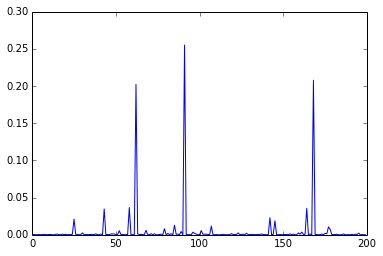

In [185]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def uncollapsed_expected_value(samples):
    average_thetas = [0.0]*len(samples[0][0])
    for sample in samples:
        sample_thetas = sample[0]
        for i in range(len(average_thetas)):
            average_thetas[i] += sample_thetas[i]
    average_thetas = [theta/len(samples) for theta in average_thetas]
    return average_thetas
    
expected_theta = uncollapsed_expected_value(samples)
plt.plot(range(len(expected_theta)), expected_theta)
plt.show()